In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("gender_classification_v7.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [4]:
data.shape

(5001, 8)

In [5]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


<AxesSubplot:>

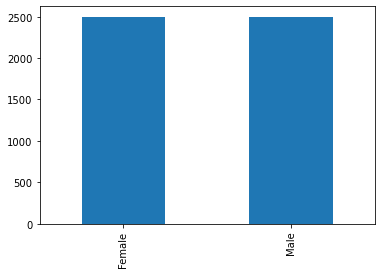

In [7]:
data['gender'].value_counts().plot(kind='bar')

In [12]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
y=le.fit_transform(y)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [19]:
y_pred=classifier.predict(X_test)


In [20]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[1 1]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[465  15]
 [ 20 501]]


0.965034965034965

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(classifier, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [36]:
print('accuracy: %.3f' % (np.mean(n_scores)))

accuracy: 0.964


0.965034965034965